## CAR PRICE PRIDICTION

##### Steps followed are:
* Data Cleaning And Data Checkes
* Exploratory Data Analysis(EDA)
* Data Preprocessing
* Data Transforamtion
* Model Training (Random Forest) and Hyperparameter tuning
* Model Evaluation
* Prediction

#### Dataset Metadata
##### Dataset Name: Car Price Prediction Dataset

Description: This dataset contains information about various cars and their attributes, used for predicting the prices of cars.

Features (Columns):
* Id(int): The id for the car(e.g., 11331289)
* Make_Model (str): Combined make and model of the car (e.g., "Toyota-Camry").
* Year (int): The year the car was manufactured.
* Mileage (int): The total distance the car has been driven (in miles).
* Transmission (str): The type of transmission in the car (e.g., "Automatic", "Manual").
* Fuel_type (str): The type of fuel the car uses (e.g., "Gasoline", "Diesel", "Electric").
* Body_type (str): The style of the car's body (e.g., "Sedan", "SUV", "Hatchback").
* Color (str): The color of the car's exterior.
* City (str): The location where the car is being sold.
* Price (float): The target variable representing the price of the car.

#### Data Checkes And Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

##### Data Importing

In [4]:
df = pd.read_csv('..\data_collection\data_collection\data.csv')

##### Top 5 records of dataset

In [5]:
df.head()

,Id,City,Make,Model,Body_type,Transmission,No_of_owners,color,Milleage,Fuel_type,Make_year,Price
0,13387215,Hyderabad,Renault,Kwid,hatchback,manual,1,grey,36K,petrol,2016,322000.0
1,13090943,Hyderabad,Hyundai,Xcent,sedan,manual,1,white,76K,petrol,2014,385000.0
2,12677849,Hyderabad,Renault,Kwid,hatchback,manual,1,white,49K,petrol,2022,430411.0
3,12385794,Hyderabad,Hyundai,Creta,suv,manual,2,red,96K,petrol,2015,765927.0
4,12961434,Hyderabad,Hyundai,Elite i20,hatchback,manual,1,white,72K,diesel,2016,669901.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635 entries, 0 to 4634
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            4635 non-null   int64  
 1   City          4635 non-null   object 
 2   Make          4635 non-null   object 
 3   Model         4635 non-null   object 
 4   Body_type     4635 non-null   object 
 5   Transmission  4635 non-null   object 
 6   No_of_owners  4635 non-null   int64  
 7   color         4634 non-null   object 
 8   Milleage      4635 non-null   object 
 9   Fuel_type     4635 non-null   object 
 10  Make_year     4635 non-null   int64  
 11  Price         4635 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 434.7+ KB


##### Insights
* The dataset has the shape (4635,11)
* Categorical Variables: Make, Model, Transmission, Fuel_type, Body_type, Color, City
* Numerical Variables: Make_Year, Mileage, Price

In [7]:
df.describe()

,Id,No_of_owners,Make_year,Price
count,4.635000e+03,4635.000000,4635.000000,4.635000e+03
mean,1.221860e+07,1.209924,2017.477238,6.973652e+05
std,1.164539e+06,0.468872,3.171012,4.190318e+05
min,3.674520e+05,1.000000,2009.000000,9.900000e+04
25%,1.151934e+07,1.000000,2015.000000,4.132895e+05
50%,1.260156e+07,1.000000,2018.000000,5.890000e+05
75%,1.307320e+07,1.000000,2020.000000,8.678900e+05
max,1.357004e+07,3.000000,2024.000000,4.290000e+06


#### Null Value Handling

In [8]:
df.isnull().sum()

Id              0
City            0
Make            0
Model           0
Body_type       0
Transmission    0
No_of_owners    0
color           1
Milleage        0
Fuel_type       0
Make_year       0
Price           0
dtype: int64

In [9]:
df.dropna(axis=0,inplace= True)

In [10]:
df.isnull().sum()

Id              0
City            0
Make            0
Model           0
Body_type       0
Transmission    0
No_of_owners    0
color           0
Milleage        0
Fuel_type       0
Make_year       0
Price           0
dtype: int64

#### Duplucate Value Handling


In [11]:
df.duplicated().sum()

12

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

#### Checking for unique values for each Categorical feature

In [18]:
print("Categories in featrure 'City' : ",end=" ")
print(df['City'].unique())
print()
print("Categories in featrure 'Make' : ",end=" ")
print(df['Make'].unique())
print()
print("Categories in featrure 'Model' :",end=" ")
print(df['Model'].unique())
print()
print("Categories in featrure 'Body_type' : ",end=" ")
print(df['Body_type'].unique())
print()
print("Categories in featrure 'Transmission' : ",end=" ")
print(df['Transmission'].unique())
print()
print("Categories in featrure 'color' : ",end=" ")
print(df['color'].unique())
print()
print("Categories in featrure 'Fuel_type' : ",end=" ")
print(df['Fuel_type'].unique())

Categories in featrure 'City' :  ['Hyderabad' 'Noida' 'Delhi' 'Ghaziabad' 'Faridabad' 'Gurgaon' 'Bangalore'
 'Kolkata' 'Chennai' 'Pune']

Categories in featrure 'Make' :  ['Renault' 'Hyundai' 'Maruti Suzuki' 'Mahindra' 'Honda' 'Kia' 'Ford'
 'Tata' 'Jeep' 'Datsun' 'Nissan' 'Volkswagen' 'Toyota' 'Skoda' 'Chevrolet'
 'MG Motors' 'Mercedes-Benz' 'BMW' 'Audi' 'Volvo' 'Land Rover']

Categories in featrure 'Model' : ['Kwid' 'Xcent' 'Creta' 'Elite i20' 'Grand i10' 'Alto 800' 'Celerio' 'Eon'
 'Grand i10 Nios' 'New Santro 1.1' 'XUV500' 'Wagon R 1.2' 'Triber' 'Brio'
 'Brezza' 'XUV700' 'TUV300' 'Wagon R 1.0' 'Alto K10' 'i10' 'Ritz' 'Jazz'
 'Swift' 'Bolero' 'Venue' 'Sonet' 'Baleno' 'S-Presso' 'XL6' 'Kiger'
 'Freestyle' 'XUV 300' 'Aura' 'WR-V' 'Altroz' 'New i20' 'Ignis' 'City'
 'S-Cross' 'Compass' 'Eeco' 'Safari' 'Scorpio' 'Grand Vitara' 'Seltos'
 'Dzire' 'Verna Transform' 'Figo Aspire' 'Thar' 'GO' 'Nexon' 'Bolero Neo'
 'i20' 'BR-V' 'Magnite' 'Ciaz' 'Tiguan' 'Taigun' 'Etios' 'Verna' 'Virtus'
 'Vitar

#### Features Engineering

In [19]:
df['Make_Model'] = df['Make'] + "-" + df['Model']
df.head()

,Id,City,Make,Model,Body_type,Transmission,No_of_owners,color,Milleage,Fuel_type,Make_year,Price,Make_Model
0,13387215,Hyderabad,Renault,Kwid,hatchback,manual,1,grey,36K,petrol,2016,322000.0,Renault-Kwid
1,13090943,Hyderabad,Hyundai,Xcent,sedan,manual,1,white,76K,petrol,2014,385000.0,Hyundai-Xcent
2,12677849,Hyderabad,Renault,Kwid,hatchback,manual,1,white,49K,petrol,2022,430411.0,Renault-Kwid
3,12385794,Hyderabad,Hyundai,Creta,suv,manual,2,red,96K,petrol,2015,765927.0,Hyundai-Creta
4,12961434,Hyderabad,Hyundai,Elite i20,hatchback,manual,1,white,72K,diesel,2016,669901.0,Hyundai-Elite i20


In [20]:
df['Make_Model'].value_counts()

Make_Model
Renault-Kwid             280
Hyundai-Grand i10        181
Maruti Suzuki-Swift      169
Hyundai-Creta            156
Hyundai-Elite i20        151
                        ... 
Mercedes-Benz-E-Class      1
Audi-A4                    1
Volvo-S60                  1
BMW-5 Series               1
Maruti Suzuki-Alto         1
Name: count, Length: 162, dtype: int64

In [21]:
df['Fuel_type'] = df['Fuel_type'].replace('Petrol', 'petrol')

In [22]:
df['Milleage'] = df['Milleage'].str.replace('K', '').astype(int)

In [23]:
df['City'] = df['City'].replace(['Noida', 'Ghaziabad','Faridabad','Gurgaon'], 'Delhi')

#### Here:
* First Created a new feature that contains combination of make and model.
* Replaced "Petrol" with "petrol"
* Converted "Mileage" Column into Numerical Feature

#### Exploratory Data Analysis
* Univariant Analysis
* BIvariant Analysis
* Multivariant Analysis

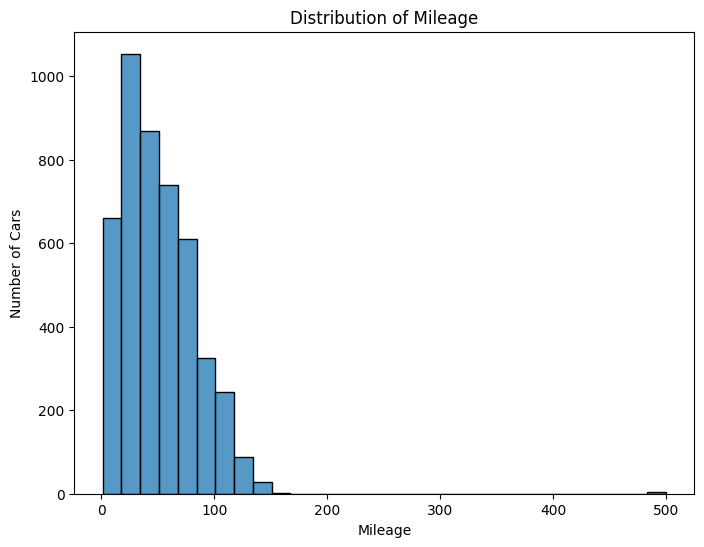

In [24]:
# Univariate Analysis

# Distribution of Mileage
plt.figure(figsize=(8, 6))
sns.histplot(df['Milleage'], bins=30)
plt.xlabel('Mileage')
plt.ylabel('Number of Cars')
plt.title('Distribution of Mileage')
plt.show()

#### Insights:
* Most of the cars had driven between 0 to 100kms

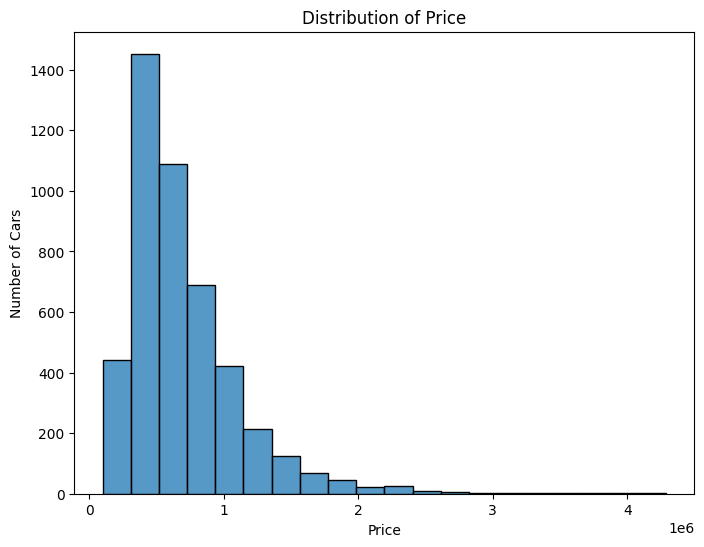

In [25]:
# Distribution of Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.title('Distribution of Price')
plt.show()

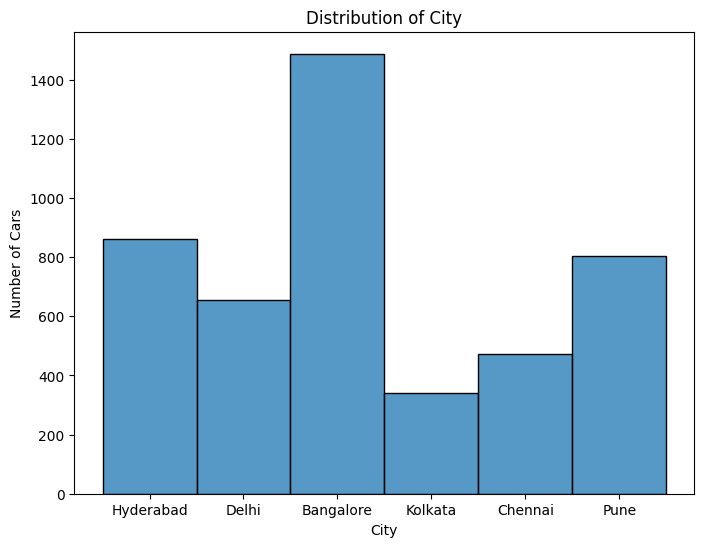

In [26]:
# Distribution of City
plt.figure(figsize=(8, 6))
sns.histplot(df['City'], bins=20)
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Distribution of City')
plt.show()

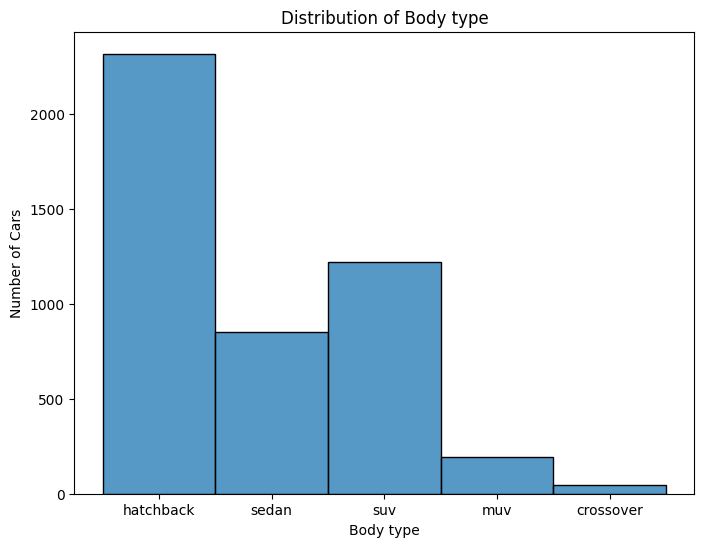

In [27]:
# Distribution of Body type
plt.figure(figsize=(8, 6))
sns.histplot(df['Body_type'], bins=20)
plt.xlabel('Body type')
plt.ylabel('Number of Cars')
plt.title('Distribution of Body type')
plt.show()

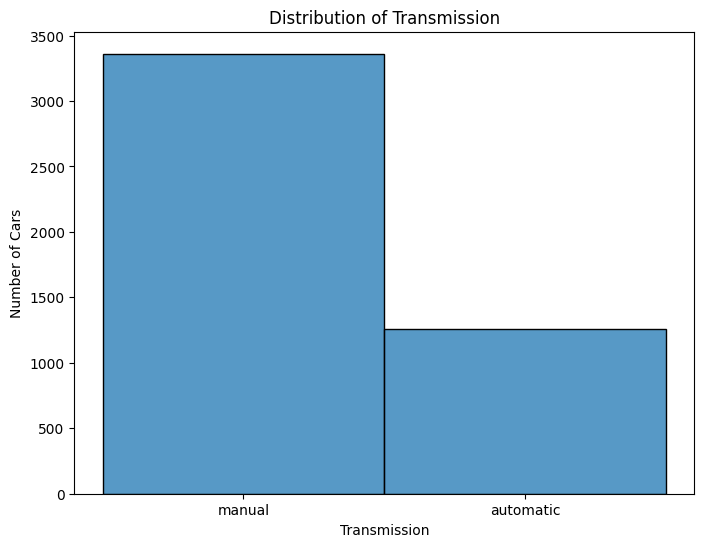

In [28]:
# Distribution of Transmission
plt.figure(figsize=(8, 6))
sns.histplot(df['Transmission'], bins=20)
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
plt.title('Distribution of Transmission')
plt.show()

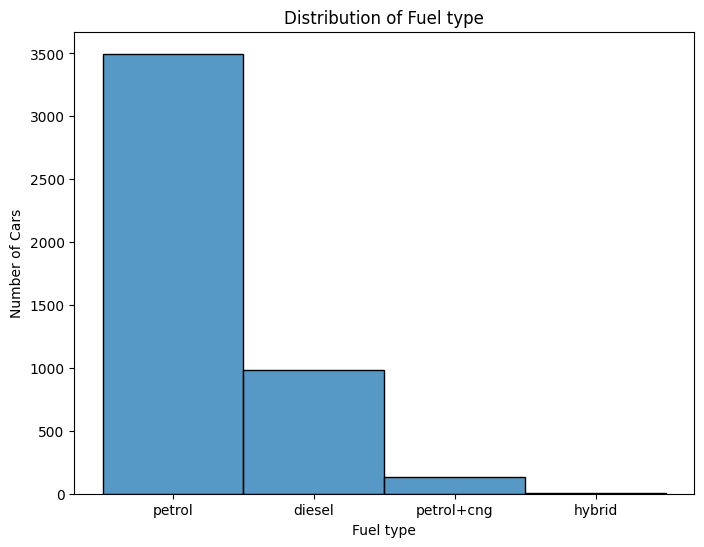

In [29]:
# Distribution of Fuel type
plt.figure(figsize=(8, 6))
sns.histplot(df['Fuel_type'], bins=20)
plt.xlabel('Fuel type')
plt.ylabel('Number of Cars')
plt.title('Distribution of Fuel type')
plt.show()

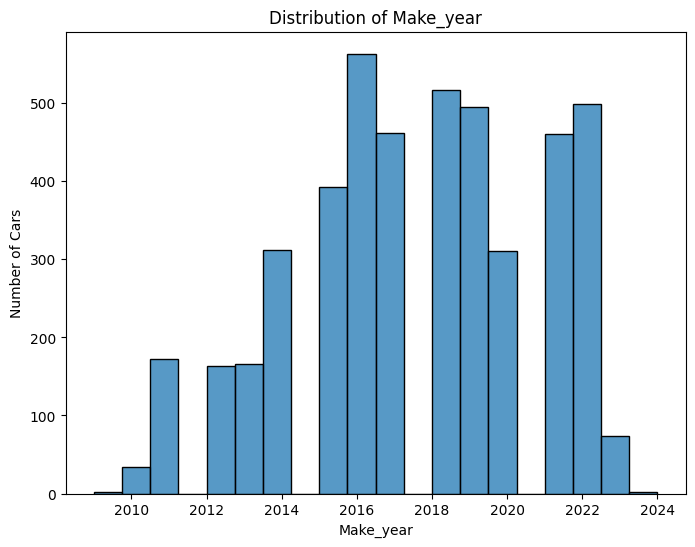

In [30]:
# Distribution of Make_year
plt.figure(figsize=(8, 6))
sns.histplot(df['Make_year'], bins=20)
plt.xlabel('Make_year')
plt.ylabel('Number of Cars')
plt.title('Distribution of Make_year')
plt.show()

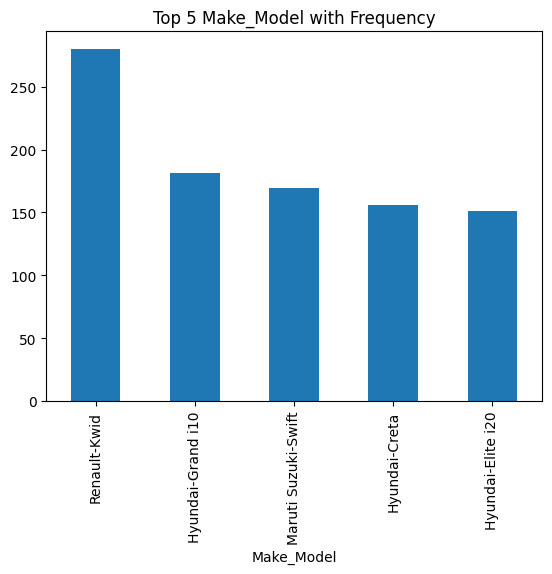

In [31]:
import matplotlib.pyplot as plt
df['Make_Model'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 Make_Model with Frequency')
plt.show()


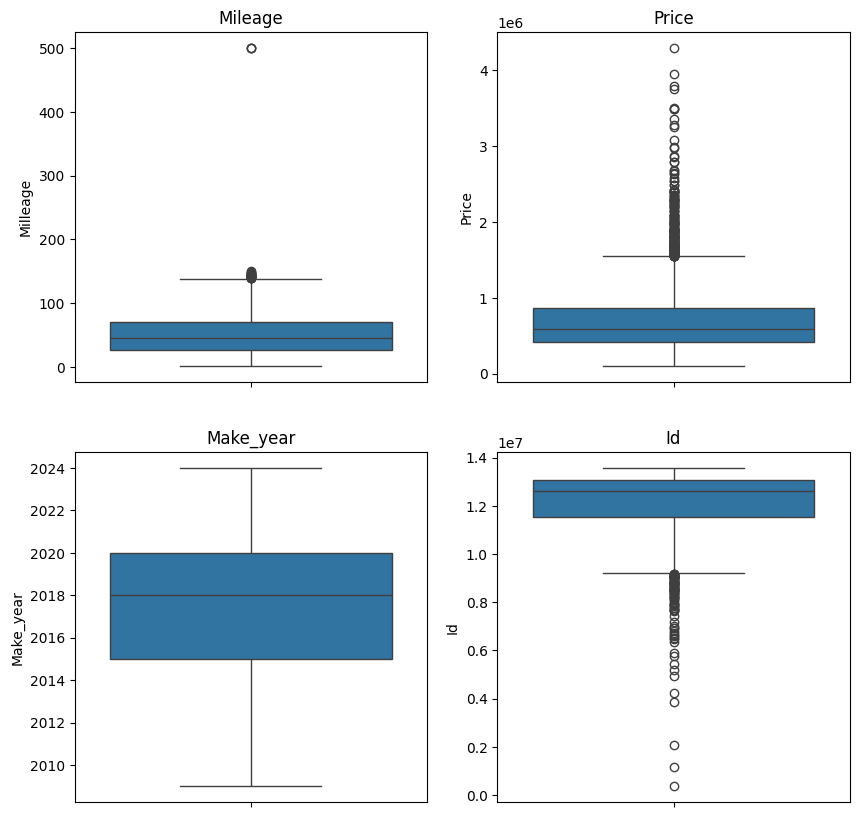

In [32]:
# Create subplots for each numerical feature
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot boxplot for Mileage
sns.boxplot(data=df['Milleage'], ax=axes[0, 0])
axes[0, 0].set_title('Mileage')

# Plot boxplot for Price
sns.boxplot(data=df['Price'], ax=axes[0, 1])
axes[0, 1].set_title('Price')

# Plot boxplot for Make_year
sns.boxplot(data=df['Make_year'], ax=axes[1, 0])
axes[1, 0].set_title('Make_year')

# Plot boxplot for ID
sns.boxplot(data=df['Id'], ax=axes[1, 1])
axes[1, 1].set_title('Id')

# Show the plot
plt.show()

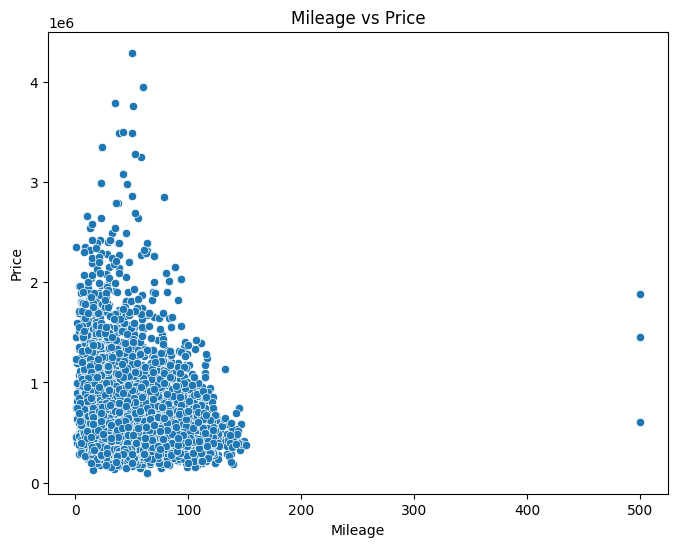

In [33]:
# Bivariate Analysis

# Scatter plot of Mileage vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Milleage', y='Price', data=df)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()

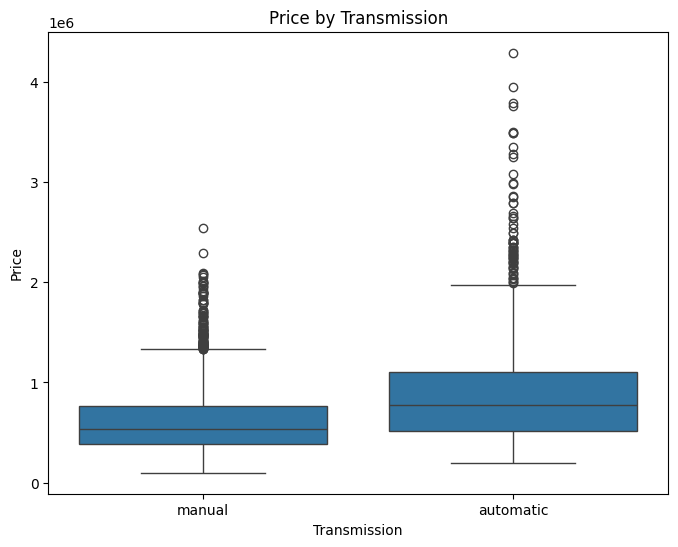

In [34]:

# Boxplot of Price by Transmission
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.title('Price by Transmission')
plt.show()

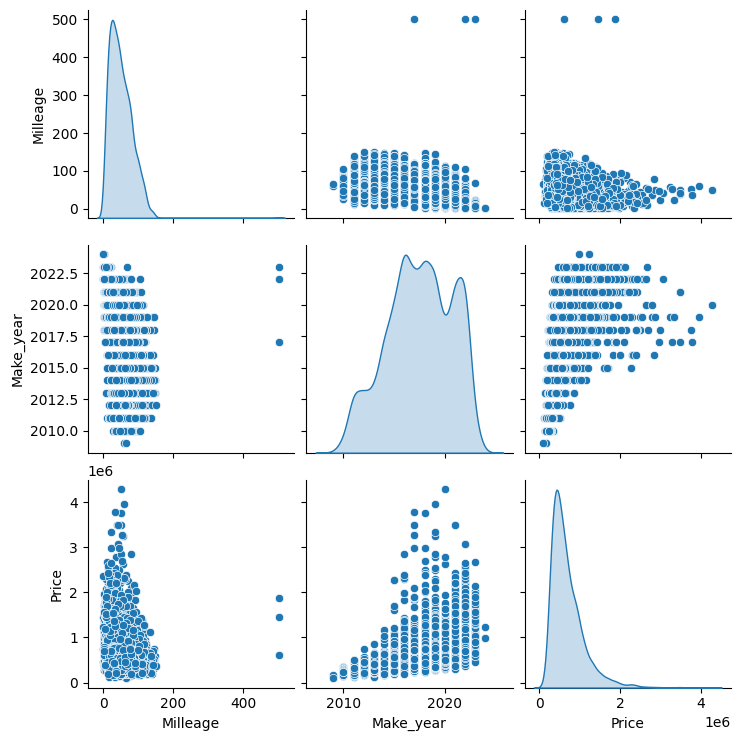

In [35]:
# Multivariate Analysis

# Pairwise plot of numerical variables
sns.pairplot(df[['Milleage', 'Make_year', 'Price']], diag_kind='kde')
plt.show()

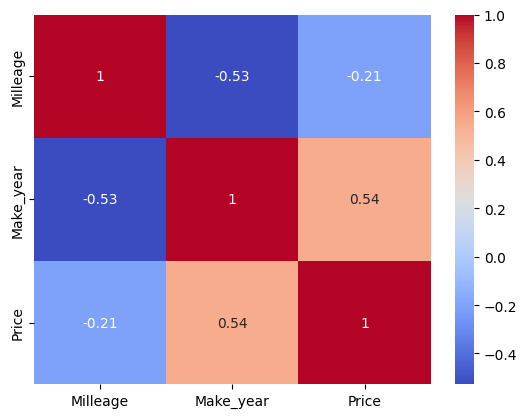

In [36]:
# Correlation matrix of numerical variables
corr_matrix = df[['Milleage', 'Make_year', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#### Data Preprocessing

In [37]:
df.head()

,Id,City,Make,Model,Body_type,Transmission,No_of_owners,color,Milleage,Fuel_type,Make_year,Price,Make_Model
0,13387215,Hyderabad,Renault,Kwid,hatchback,manual,1,grey,36,petrol,2016,322000.0,Renault-Kwid
1,13090943,Hyderabad,Hyundai,Xcent,sedan,manual,1,white,76,petrol,2014,385000.0,Hyundai-Xcent
2,12677849,Hyderabad,Renault,Kwid,hatchback,manual,1,white,49,petrol,2022,430411.0,Renault-Kwid
3,12385794,Hyderabad,Hyundai,Creta,suv,manual,2,red,96,petrol,2015,765927.0,Hyundai-Creta
4,12961434,Hyderabad,Hyundai,Elite i20,hatchback,manual,1,white,72,diesel,2016,669901.0,Hyundai-Elite i20


In [38]:
df.drop(columns=['Id','Make','Model'],inplace=True)

In [39]:
df.head()

,City,Body_type,Transmission,No_of_owners,color,Milleage,Fuel_type,Make_year,Price,Make_Model
0,Hyderabad,hatchback,manual,1,grey,36,petrol,2016,322000.0,Renault-Kwid
1,Hyderabad,sedan,manual,1,white,76,petrol,2014,385000.0,Hyundai-Xcent
2,Hyderabad,hatchback,manual,1,white,49,petrol,2022,430411.0,Renault-Kwid
3,Hyderabad,suv,manual,2,red,96,petrol,2015,765927.0,Hyundai-Creta
4,Hyderabad,hatchback,manual,1,white,72,diesel,2016,669901.0,Hyundai-Elite i20


In [40]:
df['Price'] = df['Price'] / 100000

In [41]:
df.head()

,City,Body_type,Transmission,No_of_owners,color,Milleage,Fuel_type,Make_year,Price,Make_Model
0,Hyderabad,hatchback,manual,1,grey,36,petrol,2016,3.22000,Renault-Kwid
1,Hyderabad,sedan,manual,1,white,76,petrol,2014,3.85000,Hyundai-Xcent
2,Hyderabad,hatchback,manual,1,white,49,petrol,2022,4.30411,Renault-Kwid
3,Hyderabad,suv,manual,2,red,96,petrol,2015,7.65927,Hyundai-Creta
4,Hyderabad,hatchback,manual,1,white,72,diesel,2016,6.69901,Hyundai-Elite i20


In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, le in self.encoders.items():
            X_copy[col] = le.transform(X_copy[col])
        return X_copy

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_column):
        self.target_column = target_column
        self.target_encoding = {}

    def fit(self, X, y=None):
        for category in X[self.target_column].unique():
            self.target_encoding[category] = X[X[self.target_column] == category]['Price'].mean()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.target_column] = X_copy[self.target_column].map(self.target_encoding)
        return X_copy



In [43]:
# Define the pipeline for preprocessing
from sklearn.pipeline import Pipeline

categorical_cols = ['City', 'Body_type', 'Transmission', 'Fuel_type']

preprocessing_pipeline = Pipeline([
    ('label_encoder', CustomLabelEncoder(columns=categorical_cols)),
    ('target_encoder_Make_Model', TargetEncoder(target_column='Make_Model')),
    ('target_encoder_Color', TargetEncoder(target_column='color')),
])

# Fit and transform the data using the pipeline
df_transformed = preprocessing_pipeline.fit_transform(df)

# Display the transformed DataFrame
print(df_transformed.head())

   City  Body_type  Transmission  No_of_owners     color  Milleage  Fuel_type  \
0     3          1             1             1  6.501693        36          2   
1     3          3             1             1  7.588856        76          2   
2     3          1             1             1  7.588856        49          2   
3     3          4             1             2  6.566442        96          2   
4     3          1             1             1  7.588856        72          0   

   Make_year    Price  Make_Model  
0       2016  3.22000    3.921803  
1       2014  3.85000    4.668690  
2       2022  4.30411    3.921803  
3       2015  7.65927   10.417645  
4       2016  6.69901    5.911615  


In [44]:
df = df_transformed

In [45]:
df.head()

,City,Body_type,Transmission,No_of_owners,color,Milleage,Fuel_type,Make_year,Price,Make_Model
0,3,1,1,1,6.501693,36,2,2016,3.22000,3.921803
1,3,3,1,1,7.588856,76,2,2014,3.85000,4.668690
2,3,1,1,1,7.588856,49,2,2022,4.30411,3.921803
3,3,4,1,2,6.566442,96,2,2015,7.65927,10.417645
4,3,1,1,1,7.588856,72,0,2016,6.69901,5.911615


#### Here:
* Used Label encoder for columns like (City,Body_type,transmission,Fuel_type) and,
* Used Traget encoder for columns like Color and Make_Model.
* We used pipelines here because while prediction we can just use this pipeline for transformation of input data to model specific.

#### Model Training and Hyper parameter tunning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

def train_model(X_train, y_train):
    # Define the RandomForestRegressor with hyperparameters for tuning
    rf = RandomForestRegressor(random_state=42)
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform RandomizedSearchCV for hyperparameter tuning
    randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    randomized_search.fit(X_train, y_train)

    best_model = randomized_search.best_estimator_
    return best_model

In [47]:
def evaluate_model(model, X_test, y_test):
    # Evaluate the model using mean squared error and R-squared metrics
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2



In [48]:
df.head(1)

,City,Body_type,Transmission,No_of_owners,color,Milleage,Fuel_type,Make_year,Price,Make_Model
0,3,1,1,1,6.501693,36,2,2016,3.22,3.921803


In [49]:
def predict_price(input_data, trained_model):
    # Apply correct encoders to input data
    input_df = pd.DataFrame([input_data])
    input_df['Make_Model'] = input_df['Make'] + "-" + input_df['Model']
    input_df.drop(columns=['Make', 'Model'], axis=1, inplace=True)

    input_transformed = preprocessing_pipeline.transform(input_df)

    # Predict the price using the trained model
    predicted_price = trained_model.predict(input_transformed)[0]

    return predicted_price

#### Applying Train Test Split

In [50]:
#Split the data into training and test sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training the Model

In [51]:
#Train the model with hyperparameter tuning
best_model = train_model(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


#### Model Evaluation

In [52]:
#Evaluate the model
mse, r2 = evaluate_model(best_model, X_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9173366254617078
R-squared: 0.9558123825135587


#### Prediction

In [53]:
#Get user input for prediction
input_data = {}
input_data['City'] = input("Enter city: ")
input_data['Body_type'] = input("Enter body type: ")
input_data['Transmission'] = input("Enter transmission type: ")
input_data['No_of_owners'] = input("Enter No_of_owners: ")
input_data['color'] = input("Enter color: ")
input_data['Milleage'] = int(input("Enter mileage: "))
input_data['Fuel_type'] = input("Enter fuel type: ").lower()
input_data['Make_year'] = int(input("Enter year: "))
input_data['Make'] = input("Enter make: ")
input_data['Model'] = input("Enter model: ")

# Step 7: Predict the price
predicted_price = predict_price(input_data, best_model)

print(f"Predicted price: {predicted_price}")

KeyboardInterrupt: Interrupted by user